<center>
    
# Identification and classification of illustrations in historic books
    
### A project for *Machine Learning with Tensorflow*

### By *Irena Kampa*

### 26.1.2021 </center>

---

## <h2>1. Introduction<h2>

More and more libraries digitalize their old collections and make them available to a worldwide public. Scans of thousands of historic works are already available. Artificial intelligence will be needed to process all this information and prepare it for scientific research.
In this project I want to train a CNN to identify illustrations in monographies from  the 15th to the 18th century. In a second step I want to find and classify only the illustrations that show astronomical instruments of different types.

## <h2> 2. Preparation of the data (Jupyter) </h2>

### 2.1 Import libraries

In [2]:
import os
import random
from shutil import copyfile

### 2.2 Create an initial dataset from the imprecise original data

The original dataset contains almost 25.000 scanned pages in the JPG-format. They are ordered in two folders:
1. A folder that contains all pages (including some with illustrations) - 24.140 scans
2. A folder that contains pages with (significant) illustrations -2103 scans

I will draw a subset from this data to form my new initial dataset. This new dataset will be checked manually, if the classificaton is correct.

In [ ]:
# Create a list with  the original filenames

## Base directory:
directory_org = 'D:/Dokumente/Studium/Opencampus/TensorFlow/Code'

## directory with pages containing illustrations:  
pic_org_dir = os.path.join(directory_org, "Original", "pictures")

## directory with all pages from the books (still including illustrations):
books_org_dir = os.path.join(directory_org, "Original", "books")

## create lists that contain the file names:
pic_org_lst = os.listdir( pic_org_dir )
print("Number of files in \"pictures\":", len(pic_org_lst))
print("First 5 filenames:", pic_org_lst[:5], "\n")

books_org_lst = os.listdir( books_org_dir )
print("Number of files in \"books\":", len(books_org_lst))
print("First 5 filenames:", books_org_lst[:5])

Number of files in "pictures": 2103
First 5 filenames: ['1.jpg', '2 Piccolomini ok.jpg', '2.jpg', '22_gemelli.jpg', '23_toro.jpg'] 

Number of files in "books": 24140
First 5 filenames: ['a-0001-zle.jpg', 'a-0002-zle.jpg', 'a-0003.jpg', 'a-0004.jpg', 'a-0005.jpg']


In [ ]:
# Draw randomly from the file list

## number of pages for the initial dataset:
number_pics = 1900
number_books = 3000 #I need more scans from the books, because they still contain some illustrations

## create two new lists that contain a random sample of the desired size:
rand_pic_org_lst = random.sample(pic_org_lst, number_pics)
rand_books_org_lst = random.sample(books_org_lst, number_books)

## check if the lists are correct:
print("Number \"pictures\"-list items:", len(rand_pic_org_lst))
print("First 5 filenames:", rand_pic_org_lst[:5], "\n")

print("Number of \"books\"-list items:", len(rand_books_org_lst))
print("First 5 filenames:", rand_books_org_lst[:5])

Number "pictures"-list items: 1900
First 5 filenames: ['Rost_1718_x-271.jpg', 'Borelli_1655_x-085.jpg', 'Stoeffler_1512_x-066.jpg', 'Gallucci_1603_x-298.jpg', 'x-534.jpg'] 

Number of "books"-list items: 3000
First 5 filenames: ['x-596 (3).jpg', 'x-075 (36).jpg', 'x-114 (15).jpg', 'x-359 (12).jpg', 'x-012 (55).jpg']


In [ ]:
# Copy the files to the directory "initial"

## Destination paths:
path_pics = os.path.join(directory_org, "Data", "initial", "pictures")
path_books = os.path.join(directory_org, "Data", "initial", "books")

# Copy to "pictures" folder:
for i in rand_pic_org_lst:
    path_source =  os.path.join(pic_org_dir, i)
    path_destination = os.path.join(path_pics, i)
    copyfile(path_source, path_destination)
    
# Copy to "books" folder:
for i in rand_books_org_lst:
    path_source =  os.path.join(books_org_dir, i)
    path_destination = os.path.join(path_books, i)
    copyfile(path_source, path_destination)


---
At this point I need to **manually check** all the pages in both folders. Additionally, I use the freeware "SimilarImages" to find possible doublets.

---


In [ ]:
# Create two lists with the initial file names


pic_lst = os.listdir( path_pics )
print("Number of files in \"pictures\":", len(pic_lst))

no_pic_lst = os.listdir( path_books )
print("Number of files in \"books\":", len(no_pic_lst))

Number of files in "pictures": 2012
Number of files in "books": 2386


My initial data set is finished. It contains 2012 scans with illustrations and 2386 without.

### 2.3 Split the initial dataset into training and validation set

In [ ]:
# Read in of the initial data
## repetition of the cells above incase we start here

## Base directory:
directory_org = 'D:/Dokumente/Studium/Opencampus/TensorFlow/Code'

## Source paths:
path_pics = os.path.join(directory_org, "Data", "initial", "pictures")
path_books = os.path.join(directory_org, "Data", "initial", "books")

## Create two lists with the initial file names
pic_lst = os.listdir( path_pics )
print("Number of files in \"pictures\":", len(pic_lst))

no_pic_lst = os.listdir( path_books )
print("Number of files in \"books\":", len(no_pic_lst))


Number of files in "pictures": 2012
Number of files in "books": 2386


In [ ]:
# Create the directories

## Base directory:
path_dataset = os.path.join(directory_org, "Data", "Dataset")

## train and validation sub-directories:
path_train = os.path.join(path_dataset, "train")
path_validation = os.path.join(path_dataset, "validation")

## pictures and no_pictures sub-directories:
path_pics_train = os.path.join(path_train, "pictures")
path_pics_validation = os.path.join(path_validation, "pictures")

path_no_pics_train = os.path.join(path_train, "no_pictures")
path_no_pics_validation = os.path.join(path_validation, "no_pictures")

## Temporary list with directories:
tmp_dir = [path_dataset, path_train, path_validation, path_pics_train, path_pics_validation, path_no_pics_train, path_no_pics_validation ]

## Create the directories
for i in tmp_dir:
    os.mkdir(i)

In [ ]:
# Set the training and validation sizes:

## Total number of scans per class that will be used in the CNN:
num_data = 1300

## Number of scans per class for training (80%):
split = int(num_data*0.8)


In [ ]:
#Shuffle the lists to assure randomness:

random.shuffle (pic_lst)
random.shuffle (no_pic_lst)

In [ ]:
# Copy the files into the directories:

## train => pictures:
for i in pic_lst[:split]:
    path_source =  os.path.join(path_pics, i)
    path_destination = os.path.join(path_pics_train, i)
    copyfile(path_source, path_destination)

## validation => pictures:
for i in pic_lst[split:num_data]:
    path_source =  os.path.join(path_pics, i)
    path_destination = os.path.join(path_pics_validation, i)
    copyfile(path_source, path_destination)

## train => no_pictures:
for i in no_pic_lst[:split]:
    path_source =  os.path.join(path_books, i)
    path_destination = os.path.join(path_no_pics_train, i)
    copyfile(path_source, path_destination)

## validation => no_pictures:
for i in no_pic_lst[split:num_data]:
    path_source =  os.path.join(path_books, i)
    path_destination = os.path.join(path_no_pics_validation, i)
    copyfile(path_source, path_destination)

In [ ]:
#Check number of pictures in each folder:

print('total training pages with pictures:', len(os.listdir(path_pics_train)))
print('total training pages with no pictures :', len(os.listdir(path_no_pics_train)))

print('total validation pages with pictures :', len(os.listdir(path_pics_validation)))
print('total validation pages with no pictures :', len(os.listdir(path_no_pics_validation)))


total training pages with pictures: 1040
total training pages with no pictures : 1040
total validation pages with pictures : 260
total validation pages with no pictures : 260


This conclude the creation of my dataset. 

I will copy these files to my google drive folder to calculate the CNN with google colab. 

## <h2> 3. Convolutional Neural Network (in Google Colab) </h2>

### 3.1 Import libraries

In [1]:
import numpy as np
import os
import random
from shutil import copyfile

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math

### 3.1 Set up the CNN

#### 3.1.1 File directories

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the directories that contain the data. The data was previously uploaded to google drive.

## Path to base directory in google drive that contains the data:
base_dir = "/content/drive/My Drive/Tensorflow/Data/"

## Paths to training and validation directories:
path_train = os.path.join(base_dir, 'train')
path_validation = os.path.join(base_dir, 'validation')

## Subdirectories inside the training directory:
path_pics_train = os.path.join(path_train, 'pictures')
path_no_pics_train = os.path.join(path_train, 'no_pictures')

## Subdirectories inside the validation directories:
path_pics_validation = os.path.join(path_validation, 'pictures')
path_no_pics_validation = os.path.join(path_validation, 'no_pictures')

In [5]:
#Check the number of scans in each folder:

print('total training pages with pictures:', len(os.listdir(path_pics_train)))
print('total training pages with no pictures :', len(os.listdir(path_no_pics_train)))

print('total validation pages with pictures :', len(os.listdir(path_pics_validation)))
print('total validation pages with no pictures :', len(os.listdir(path_no_pics_validation)))

total training pages with pictures: 1040
total training pages with no pictures : 1040
total validation pages with pictures : 260
total validation pages with no pictures : 260


#### 3.1.2 Set the model parameters

In [8]:
# Define size / batch size and steps per epoch:

## Rescale images to:
imagesize_x = 150
imagesize_y = 210

## Batch sizes:
batchsize_t = 40
batchsize_v = 40

## Steps per epoch:
val_steps = math.ceil(len(os.listdir(path_pics_validation))*2 /batchsize_v)
train_steps = math.ceil(len(os.listdir(path_pics_train))*2 /batchsize_t)

In [9]:
# Use the Image Generator to label the pictures

## Use image augmentation for the training data:
train_datagen = ImageDataGenerator( 
    rescale = 1.0/255. ,           #Rescale the images to normalize the data
    rotation_range = 8,            #Scans might be slightly shifted therefore rotate up to 8 degrees
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    fill_mode = "nearest"   
    )

## Validation data:
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )


## Load the pictures from the training directory:
train_generator = train_datagen.flow_from_directory(
    path_train,                                   # training directory
    target_size=(imagesize_x, imagesize_y),       # resize pages                        
    batch_size= batchsize_t,                      # pages are loaded in batches
    class_mode='binary'                           # there are 2 classes
                                                    )     


## Load the pictures from the validation directory:
validation_generator =  valid_datagen.flow_from_directory(
    path_validation,                              # validation directory
    target_size = (imagesize_x, imagesize_y),     # resize as above                                     
    batch_size= batchsize_v,                      # as above
    class_mode  = 'binary'                        # 2 classes as above
                                                         )

Found 2080 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [10]:
# Set up the model:

model = tf.keras.models.Sequential([
    
    ### First convolution layer:
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(imagesize_x, imagesize_y, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    ### Second convolution layer:
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    ### Third convolution layer:
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    ### Fourth convolution layer:
    #tf.keras.layers.Conv2D(16, (3,3), activation='relu'), 
    #tf.keras.layers.MaxPooling2D(2,2),
    
    ### Flatten the results:
    tf.keras.layers.Flatten(), 

    ### Hidden layer:
    tf.keras.layers.Dense(100, activation='relu'), 

    ### Dropout layer:
    tf.keras.layers.Dropout(0.2), 

    ### Output layer with 1 neuron:
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 208, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 104, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 102, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 51, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 49, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 24, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 26112)             0

In [11]:
# Compile the model

model.compile(
    optimizer= "adam",        
    #optimizer = RMSprop(lr=0.0005),
    loss='binary_crossentropy',         # binary because we have only 2 classes
    metrics = ['accuracy']
    )

### 3.2 Train the CNN


#### 3.2.1 Train for 100 epochs

In [12]:
# Train the model

history = model.fit_generator(
    train_generator,                      # Stream pages from training directory
    steps_per_epoch= train_steps,         # 2080 images in training / 80 batch size
    epochs= 100,                          # number of epochs
    validation_data=validation_generator, # validation set
    validation_steps= val_steps,          # 520 pages / 80 batch size
    verbose=1                             # progress animation
    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
52/52 [==============================] - 846s 16s/step - loss: 0.8162 - accuracy: 0.5521 - val_loss: 0.5746 - val_accuracy: 0.7385
Epoch 2/100
52/52 [==============================] - 78s 2s/step - loss: 0.6201 - accuracy: 0.6814 - val_loss: 0.5627 - val_accuracy: 0.6942
Epoch 3/100
52/52 [==============================] - 78s 1s/step - loss: 0.5627 - accuracy: 0.7084 - val_loss: 0.4944 - val_accuracy: 0.7442
Epoch 4/100
52/52 [==============================] - 77s 1s/step - loss: 0.4944 - accuracy: 0.7634 - val_loss: 0.4286 - val_accuracy: 0.8058
Epoch 5/100
52/52 [==============================] - 77s 1s/step - loss: 0.4557 - accuracy: 0.7927 - val_loss: 0.3859 - val_accuracy: 0.8308
Epoch 6/100
52/52 [==============================] - 77s 1s/step - loss: 0.4284 - accuracy: 0.7975 - val_loss: 0.3734 - val_accuracy: 0.8308
Epoch 7/100
52/52 [==============================] - 77s 1s/step - loss: 0.3977 - accuracy: 0.8168 - val_loss: 0.4448 - val_accuracy: 0.7923
Epoch 8/100

#### 3.2.2 Plot the results

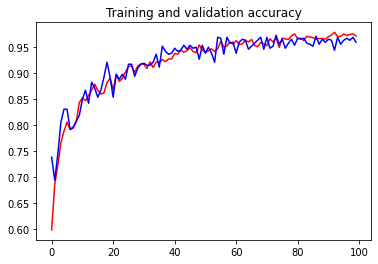

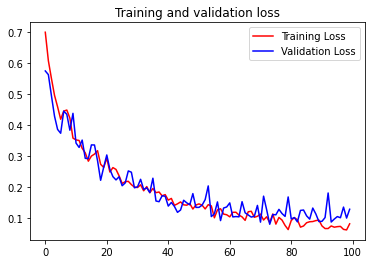

In [13]:
# Plot loss and accuracy

## Retrieve a list of results for each training epoch:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

## Get number of epochs:
epochs   = range(len(acc))

## Plot training and validation accuracy per epoch:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

## Plot training and validation loss per epoch:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 3.2.3 Save/ Load the model

In [14]:
# Model name and path
modelname = "/content/drive/My Drive/Tensorflow/CNN_Illustrations_final.h5"

In [15]:
# Save the model
model.save(modelname)

In [ ]:
# Load a saved model:

model = keras.models.load_model(modelname, compile=False)

### 3.3 Check files in directory

Now I upload the pages of an unseen book into a google drive directory. The scans will be classified as "illustration" or "no illustration" and copied into new directories.

In [94]:
# Directory with the files to check:
base_check_dir = "/content/drive/My Drive/Tensorflow/Data/predict"
check_dir = os.path.join(base_check_dir, 'org')


# Load into a list:
check_lst = os.listdir(check_dir )

print("There are", len(check_lst), "scans to check.")

There are 792 scans to check.


In [95]:
# create two lists check_pic (contains all pages with pictures) and check_no_pic (contains the rest)

## Create 2 lists:
check_pic =[]         #for pictures
check_no_pic = []     #for only text

## Predict for every picture in list:
for i in check_lst:

  ## Path of the picture:
  path = os.path.join(check_dir, i)
  ## Load the image to the target size of the model:
  img=image.load_img(path, target_size=(imagesize_x, imagesize_y))

  ## import the scans into a numpy array:
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  ## Predict the class of the image:
  classes = model.predict(images, batch_size=10)
  
  if classes[0]>0:
    check_pic.append(i)

  else:
    check_no_pic.append(i)


In [96]:
# Create the diretories "pictures" / "no_pictures"

path_check_pics = os.path.join(base_check_dir, "pictures")
path_check_no_pics = os.path.join(base_check_dir, "no pictures")

os.mkdir(path_check_pics)
os.mkdir(path_check_no_pics)

In [97]:
# Copy the files to the directories


for i in check_pic:

  path_source =  os.path.join(check_dir, i)
  path_destination = os.path.join(path_check_pics, i)
  copyfile(path_source, path_destination)

for i in check_no_pic:

  path_source =  os.path.join(check_dir, i)
  path_destination = os.path.join(path_check_no_pics, i)
  copyfile(path_source, path_destination)

# Classification into types of astronomical instruments

**Do the found illustrations show an astronomical instrument?**

In this part I want to try to find astronomical instruments in the illustrations. Therefore I will train a second CNN.

## <h2> 4. Prepare the trainig data (Jupyter) </h2>

The number of scans that actually show an astronomical instrument is quite low. I added real pictures of these instruments and graphics from other sources to the dataset. After combining several similar types of instruments to one class, I have these three classes:
1. Armillary (armillary spheres and astrolabs) - 87
2. Quadrant (quadrants, sextants, octants and cross staffs) - 248
3. Telescopes (telescopes, helioscopes) - 90

I add a fourth class for illustrations that do not show an instrument:
4. Nothing ( illustrations without instruments)

I see this part as an addition to the main project where I can try out a multi-categorical CNN. So I proceed despite the probably non sufficient dataset.

### 4.1 Create dataset for the class "Nothing"

In [7]:
# Create list with files

## directory/list with all pictures (the same variables as in 2.3 )
directory_org = 'D:/Dokumente/Studium/Opencampus/TensorFlow/Code'
path_pics = os.path.join(directory_org, "Data", "initial", "pictures")
pic_lst = os.listdir( path_pics )
print("Number of files in \"pictures\":", len(pic_lst))

Number of files in "pictures": 2012


In [5]:
# Draw randomly from the list

number_pics = 400 #number of pictures to manually classify ("Nothing")

rand_pic_lst = random.sample(pic_lst, number_pics)

In [16]:
# Create the directory

base_path_source = os.path.join(directory_org, "Data", "Classify", )
path_nothing = os.path.join(base_path_source, "initial", "Nothing")
os.mkdir(path_nothing)

In [9]:
# Copy the files to directory "initial"

for i in rand_pic_lst:
    path_source =  os.path.join(path_pics, i)
    path_destination = os.path.join(path_nothing, i)
    copyfile(path_source, path_destination)

---
At this point I **manually check** the scans in the folder "Nothing" and delete all pictures that belong to one of the other three categories.

---

In [17]:
# Create four lists with the initial file names

path_armillary = os.path.join(base_path_source, "initial", 'Armillary',)
path_quadrant = os.path.join(base_path_source, "initial", 'Quadrant')
path_telescope = os.path.join(base_path_source, "initial", 'Telescope')

armillary_lst = os.listdir(path_armillary)
nothing_lst = os.listdir( path_nothing)
quadrant_lst = os.listdir( path_quadrant)
telescope_lst = os.listdir( path_telescope)

print("Number of scans per class in the initial dataset: \n")
print("Armillary:", len(armillary_lst))
print("Nothing:", len(nothing_lst))
print("Quadrant:", len(quadrant_lst))
print("Telescope:", len(telescope_lst))

Number of scans per class in the initial dataset: 

Armillary: 87
Nothing: 255
Quadrant: 248
Telescope: 90


### 4.2 Split into training and validation set

In [22]:
# Define lists with the classes
class_lst = [armillary_lst, nothing_lst, quadrant_lst, telescope_lst]
class_names = ['Armillary', 'Nothing', 'Quadrant', 'Telescope' ]

In [24]:
# Create training and validation directories

os.mkdir(os.path.join(base_path_source, "train"))
os.mkdir(os.path.join(base_path_source, "validate"))
          
for i in range(0,4):
    os.mkdir(os.path.join(base_path_source, "train",class_names[i]))
    os.mkdir(os.path.join(base_path_source, "validate",class_names[i]))


In [25]:
# Shuffle, split and copy the files into the directories: 

for i in range(0,4):
    ### Split 80-20:
    split = int(len(class_lst[i])*0.8)
    
    ### Shuffle the list
    random.shuffle (class_lst[i])
    
    path_source = os.path.join(base_path_source, "initial", class_names[i])
    path_train = os.path.join(base_path_source, 'train', class_names[i],)
    path_validation = os.path.join(base_path_source,"validate", class_names[i])
    
    ### Copy the files:
    for k in class_lst[i][:split]:
        path_source_2 =  os.path.join(path_source, k)
        path_destination_2 = os.path.join(path_train, k)
        copyfile(path_source_2, path_destination_2)
        
    for j in class_lst[i][split:]:
        path_source_2 =  os.path.join(path_source, j)
        path_destination_2 = os.path.join(path_validation, j)
        copyfile(path_source_2, path_destination_2)

In [31]:
#Check the number of pictures in each folder:

for i in range(0,4):
    print("total training pictures for", class_names[i], ":", len(os.listdir(os.path.join(base_path_source, "train", class_names[i]))))
    print("total validation pictures for", class_names[i],":", len(os.listdir(os.path.join(base_path_source, "validate", class_names[i]))))
    print()

total training pictures for Armillary : 69
total validation pictures for Armillary : 18

total training pictures for Nothing : 204
total validation pictures for Nothing : 51

total training pictures for Quadrant : 198
total validation pictures for Quadrant : 50

total training pictures for Telescope : 72
total validation pictures for Telescope : 18



I know upload the directories to google drive to continue the calcualtion in google colab.
Although the amount of training data is rather small, I want see what kind of results I am able to get.

## <h2>5. Train the second CNN (in Google Colab) </h2>

### 5.1 Load the images

In [28]:
# Define the directories that contain the data. The data was uploaded to google drive.

## Path to base directory that contains the data:
base_classify_dir = "/content/drive/My Drive/Tensorflow/Data/Classify"

## Path to training and validation directories:
train_classify_dir = os.path.join(base_classify_dir, 'train')
validation_classify_dir = os.path.join(base_classify_dir, 'validate')

## List of subdirectories inside the training directory:
class_names = ['Armillary',  'Nothing', 'Quadrant', 'Telescope']

## Lists with the directories:
train_dirs = []
validation_dirs = []

for i in range(0,4):
  train_dirs.append(os.path.join(train_classify_dir, class_names[i]))
  validation_dirs.append(os.path.join(validation_classify_dir, class_names[i]))

In [29]:
#Check the number of pictures in each folder:

train_sum = 0
valid_sum =0

for i in range(0,4):
  print("total training pictures for", class_names[i], ":", len(os.listdir(train_dirs[i])))
  print("total validation pictures for", class_names[i],":", len(os.listdir(validation_dirs[i])))
  print()
  train_sum = train_sum + len(os.listdir(train_dirs[i]))
  valid_sum = valid_sum + len(os.listdir(validation_dirs[i]))

print("Sum of all training pictures:", train_sum)
print("Sum of all validation pictures:", valid_sum)

total training pictures for Armillary : 69
total validation pictures for Armillary : 18

total training pictures for Nothing : 204
total validation pictures for Nothing : 51

total training pictures for Quadrant : 198
total validation pictures for Quadrant : 50

total training pictures for Telescope : 72
total validation pictures for Telescope : 18

Sum of all training pictures: 543
Sum of all validation pictures: 137


### 5.2 Augment the images

In [42]:
# Define model parameters

## Rescale images to:
classify_imagesize_x = 300
classify_imagesize_y = 450

## Batch sizes:
batchsize_classify_t = 20
batchsize_classify_v = 5


# weights
#weights = {0: 3., 1: 1., 2: 1., 3: 3.}

In [30]:
# Use Image Generator to label and augment the pictures

## Image Augmentation:
train_classify_datagen = ImageDataGenerator( 
    rescale = 1.0/255. ,           
    rotation_range = 45,            
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    shear_range = 0.05,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest"   
    )


valid_classify_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [32]:
# Load the pictures

# Load the pictures from the training directory:
train_classify_generator = train_classify_datagen.flow_from_directory(
    train_classify_dir,                                             
    target_size=(classify_imagesize_x, classify_imagesize_y),                               
    batch_size= batchsize_classify_t,                      
    class_mode='categorical'                           # there are 4 classes
                                                    )     

# Load the pictures from the validation directory

validation_classify_generator =  valid_classify_datagen.flow_from_directory(
    validation_classify_dir,                               
    target_size = (classify_imagesize_x, classify_imagesize_y),                                         
    batch_size= batchsize_classify_v,                      
    class_mode  = 'categorical'                    
                                                         )

Found 538 images belonging to 4 classes.
Found 137 images belonging to 4 classes.


### 5.3 Set up the model

In [35]:
# Set up the model

model_classify = tf.keras.models.Sequential([
    
    ## First convolution layer:
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(classify_imagesize_x, classify_imagesize_y, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    ## Second convolution layer:
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    ## Third convolution layer:
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
 
    ## Flatten the results:
    tf.keras.layers.Flatten(), 

    ## Hidden layer:
    tf.keras.layers.Dense(100, activation='relu'), 

    ## Dropout layer:
    tf.keras.layers.Dropout(0.2), 

    # Output layer with 4 neurons:
    tf.keras.layers.Dense(4, activation='softmax')  
])

model_classify.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 448, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 224, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 222, 64)      73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 111, 64)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 109, 64)       36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 120960)           

In [38]:
# Compile the model

model_classify.compile(
    optimizer= "adam",       
    loss='categorical_crossentropy',         # categorical because there are 4 classes
    metrics = ['accuracy']
    )

### 5.4 Train the model

In [44]:
# Train the model

history_classify = model_classify.fit_generator(
    train_classify_generator,                     
    steps_per_epoch= 26,                  
    epochs= 100,                           
    validation_data= validation_classify_generator, 
    validation_steps= 26,                  
    verbose=1                             
    #class_weight=weights
    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
26/26 [==============================] - 50s 2s/step - loss: 1.2710 - accuracy: 0.3996 - val_loss: 1.2775 - val_accuracy: 0.3615
Epoch 2/100
26/26 [==============================] - 50s 2s/step - loss: 1.2691 - accuracy: 0.4170 - val_loss: 1.3007 - val_accuracy: 0.3615
Epoch 3/100
26/26 [==============================] - 50s 2s/step - loss: 1.2722 - accuracy: 0.3996 - val_loss: 1.2647 - val_accuracy: 0.3385
Epoch 4/100
26/26 [==============================] - 50s 2s/step - loss: 1.2642 - accuracy: 0.4286 - val_loss: 1.2900 - val_accuracy: 0.3308
Epoch 5/100
26/26 [==============================] - 50s 2s/step - loss: 1.2645 - accuracy: 0.4131 - val_loss: 1.2843 - val_accuracy: 0.3615
Epoch 6/100
26/26 [==============================] - 50s 2s/step - loss: 1.2510 - accuracy: 0.4479 - val_loss: 1.3051 - val_accuracy: 0.3923
Epoch 7/100
26/26 [==============================] - 50s 2s/step - loss: 1.2527 - accuracy: 0.4324 - val_loss: 1.2343 - val_accuracy: 0.3923
Epoch 8/100
2

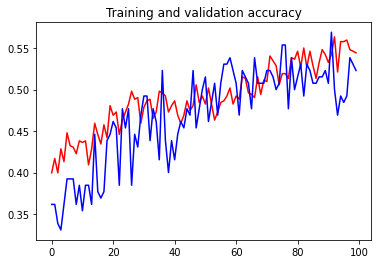

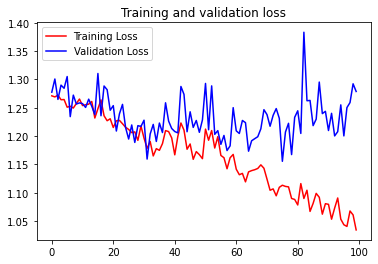

In [45]:
# Plot the results
## Retrieve a list of results  for each training epoch

acc_classify      = history_classify.history[     'accuracy' ]
val_acc_classify  = history_classify.history[ 'val_accuracy' ]
loss_classify     = history_classify.history[    'loss' ]
val_loss_classify = history_classify.history['val_loss' ]

epochs_classify   = range(len(acc_classify)) # Get number of epochs


## Plot training and validation accuracy per epoch:

plt.plot(epochs_classify, acc_classify, 'r', label='Training accuracy')
plt.plot(epochs_classify, val_acc_classify, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()


# Plot training and validation loss per epoch:
plt.plot(epochs_classify, loss_classify, 'r', label='Training Loss')
plt.plot(epochs_classify, val_loss_classify, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The accuracy and loss seem to be okay until around epoch 50. 

The validation accuracy reaches 52% which is higher than the 25% of pure chance, but still not very satisfactory. A training set with more data is needed to improve this model.

### 5.5 Save/Load the model

In [46]:
# Modelname and path
modelname_classify = "/content/drive/My Drive/Tensorflow/Model_Classify_Instruments.h5"

In [47]:
# Save model
model_classify.save(modelname_classify)

In [ ]:
# Load a saved model:

model_classify = keras.models.load_model(modelname_classify, compile=False)

## <h2> 6. Prediction for the files in "pictures" </h2>

Although the results are not very encouraging, I will classify the images that the first CNN predicted to be an illustration.

In [98]:
# Directories

## Source directory:
classify_check_dir = path_check_pics

# Load into a list:
classify_check_lst = os.listdir(classify_check_dir )

print("There are", len(classify_check_lst), "scans to check.")

## Create the subdirectories:
for i in range(0,4):
  os.mkdir(os.path.join (path_check_pics, class_names[i]))

There are 134 scans to check.


In [104]:
# Create 4 lists that hold the classified pictures:

## Create 4 lists:
classify_armillary =[]
classify_nothing = []         
classify_quadrant = []   
classify_telescope = []  

## Predict for every picture in list:
for i in classify_check_lst:

  ## Path of the picture:
  path = os.path.join(classify_check_dir, i)
  ## Load the image to the target size of the model:
  img=image.load_img(path, target_size=(classify_imagesize_x, classify_imagesize_y))

  ## import the scans into a numpy array:
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  #print(classes , "==>", path)
  
  ## Predict the class of the image:
  classes = model_classify.predict_classes(images, batch_size=10)
  
  ## Append to the respective list:
  if classes[0] == 0:
    classify_armillary.append(i)

  if classes[0] == 1:
    classify_nothing.append(i)
  
  if classes[0] == 2:
    classify_quadrant.append(i)

  if classes[0] == 3:
    classify_telescope.append(i)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [102]:
# Copy the files to the directories

for i in classify_armillary:
  path_source =  os.path.join(classify_check_dir, i)
  path_destination = os.path.join (path_check_pics, class_names[0], i)
  copyfile(path_source, path_destination)

for i in classify_quadrant:
  path_source =  os.path.join(classify_check_dir, i)
  path_destination = os.path.join (path_check_pics, class_names[2], i)
  copyfile(path_source, path_destination)

for i in classify_telescope:
  path_source =  os.path.join(classify_check_dir, i)
  path_destination = os.path.join (path_check_pics, class_names[3], i)
  copyfile(path_source, path_destination)

In [103]:
for i in classify_nothing:
  path_source =  os.path.join(classify_check_dir, i)
  path_destination = os.path.join (path_check_pics, class_names[1], i)
  copyfile(path_source, path_destination)

## <h2> 7. Test of the predictions with three (mostly) unseen books </h2>

As a conclusion, I want to test the algorithm with three books that the CNN has not yet seen. 

---
**Tycho Brahe**

The first book is Tycho Brahes "*Astronomiae Instauratae Mechanica*" from 1598. This is a famous work that has many illustrations of Tycho Brahes obervatory on the island Hven. A few pages might have been in the training set, but this is a different hand colored copy. The book has 96 pages.

The results for this book were the following: 
1. There was one false negative out of 53 only text pages.
2. There were 13 false positives out of 43. The false positives were
    - the front and back of the book, 
    - 5 empty pages were the illustrations from the backside of the page shone through (barely visible)
    - 3 pages that have an elaborate end of chapter decoration
    - 3 pages were the text is written in columns
   I would argue that false positives are int this case way preferable to false negatives. And as there is an understandable reason for the false positives, I am quite happy with the result.
   
The classification CNN gave the following results:
1. One scan was correctly classified as "Armillary".
2. 15 scans were correctly classified as "Nothing". Most of the false positives fall from bevore in this category.
3. 16 scans were correctly classified as "Quadrant". 11 are false (4x "Armillary", "7x"Nothing).
4. 0 scans are correctly classified as "Telescope". The telescope was invented later.
    Even with the small training sample, the results are better than expected.
 

---
**Hevelius - Machina Coelestis**

Hevelius had an observatory in Gdansk. He took Brahes *Astronomiae Instauratae Mechanica* as a role model and published his own descrition of his astronomical tooly in 1673. A few pages might have been in the training set, but again this is a different hand copy. The book has 546 pages.

The results for this book were the following: 
1. All 463 scans were correctly indentified as "No Picture".
2. 83 scans were classified as "Picture". 34 out of these were correct. The 49 false positives were
    - 45 empty pages
    - 1 title page
    - 2 pages with (maybe to elaborate) decoration
    - 1 page with a table
    
The classification CNN gave the following results:
1. One false "Armillary". It should have been "Nothing", but indeed it was a very round illustration.
2. One false "Nothing". It should have been "Quadrant". 43 scans were correctly classified. They all were empty pages.
3. 15 correct "Quadrants" and 23 misclassified. (16x "Nothing", 7x "Telescope")
4. 0 scans were classified as "Telescope". It should have been 7.


---
**Hevelius - Selenographia**

As a last test I take this book from 1647. It only contains 2 pictures of a telescope, but a lot of Moon illustrations. Neither of these illustrations were part of the training set. Indeed, no illustrations of the moon were present in the dataset. I am courious how the algorithm will perform on this different data. The book has 801 pages.

The results for this book were the following: 
1. Out of 658, 11 scans were false negatives . (These illustrations were mostly little diagrams, only one bigger moon illustration)
2. 134 scans were classified as "Picture". 107 out of these were correct. The 27 false positives were
    - 21 empty pages
    - 2 title pages
    - 3 end of chapter pages with decoration
    - 1 book cover

The classification CNN did not perform well with this data. There were only 3 scans that it should have placed in the telescope folder, and the remaining 131 should have been "Nothing". But the results were:
1. 0 x "Armillary" (correct)
2. 33x "Nothing" (correct)
3. 96x "Quadrant" (incorrect - should have been 3x "Telescope" and 93x "Nothing")
4. 5x "Telescope" (incorrect - should have been "Nothing")

# Conclusion

I trained a convolutional neural network to recognise illustrations in old books. It reached a validation accuracy of 96%.
A test with three books showed that the algorithm is quite good at recognising only-text pages. But it almost always misclassifies empty pages as illustrations.
I only used 2600 of my previously prepared 4400 images for training and validation.
In a future project I could create a different data set where empty pages, pages with decorative text, title pages and book covers are better represented.

I trained a second CNN to classify the found illustrations. But because of a small training sample the results were not very convincing. I reached a validation accuracy of 53%.
In the test this second algorithm was at least useful to filter out the empty pages, which it correctly classified as not containing an astronomical instrument.
